# Scikit-Learn Cheat Sheet

In [1]:
import matplotlib.pyplot as plt

In [2]:
%precision 3
ipython_plain = get_ipython().display_formatter.formatters['text/plain']
ipython_plain.for_type(np.float64, ipython_plain.lookup_by_type(float));

In [3]:
m23 = np.array([[1, 2, 3], [4, 5, 6]])

## Datasets

In [4]:
from sklearn.datasets import load_boston, load_iris, load_digits

iris, boston, digits = load_iris(), load_boston(), load_digits()
print(boston.keys())
print(iris.keys())
print(digits.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


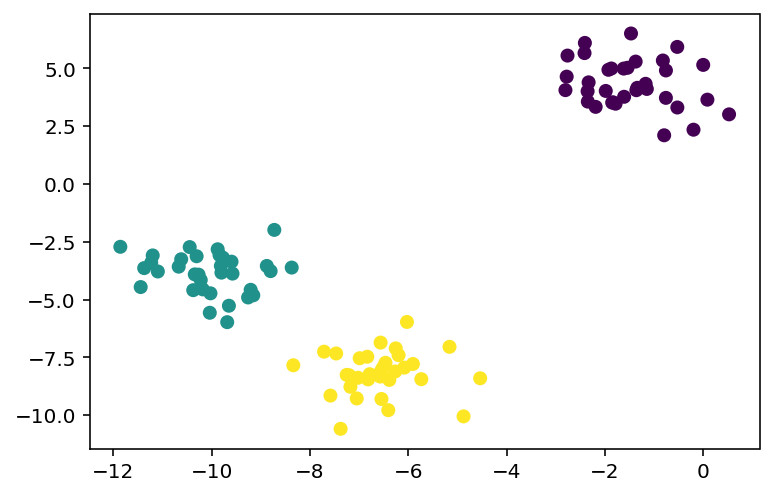

In [5]:
from sklearn.datasets import make_blobs

Xb, yb = make_blobs(n_samples = 100,
                  n_features = 2,
                  centers = 3,
                  cluster_std = 1,
                  random_state = 1)

plt.scatter(Xb[:,0], Xb[:,1], c=yb);

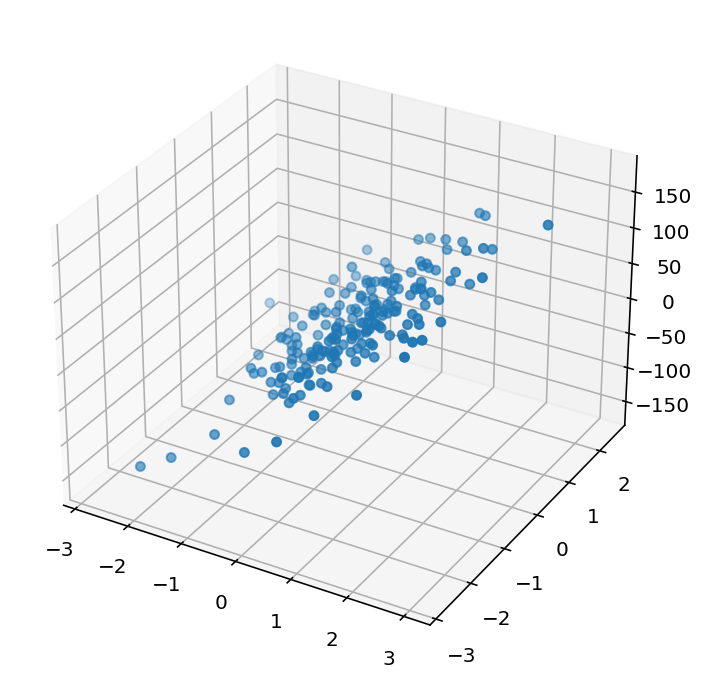

In [35]:
from sklearn.datasets import make_regression

Xr, yr = make_regression(n_samples = 200,
                       n_features = 2,
                       n_informative = 2,
                       n_targets = 1,
                       noise = 10,
                       random_state = 1)

plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(Xr[:,0], Xr[:,1], yr);

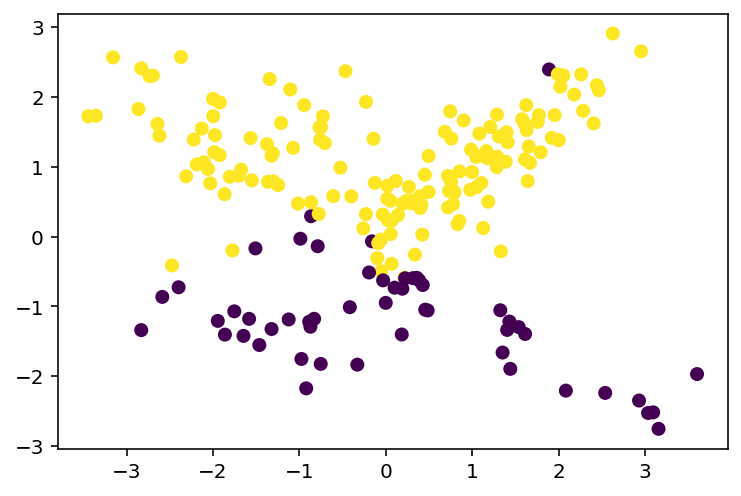

In [7]:
from sklearn.datasets import make_classification

Xc, yc = make_classification(n_samples = 200,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           n_classes = 2,
                           weights = [.25, .75],
                           random_state = 3)

plt.scatter(Xc[:,0], Xc[:,1], c=yc);

## Preprocessing

In [9]:
from sklearn.preprocessing import MinMaxScaler

X_new = MinMaxScaler().fit_transform(Xc)
X_new.min(), X_new.max()

(0.000, 1.000)

In [10]:
from sklearn.preprocessing import StandardScaler

X_new = StandardScaler().fit_transform(Xc)
X_new.mean(), X_new.std(), X_new.min(), X_new.max()

(0.000, 1.000, -2.625, 2.358)

In [11]:
from sklearn.preprocessing import RobustScaler

X_outliers = np.random.normal(0, 0.5, (10, 1))
X_outliers[0, 0] = 3
X_new = RobustScaler().fit_transform(X_outliers)
print(X_outliers.flatten())
print(X_new.flatten())
# RobustScaler scales by mean and quartile range

[ 3.     0.515  0.166  0.48  -0.582 -0.532 -0.209  0.761  0.12  -0.215]
[ 3.972  0.518  0.032  0.469 -1.007 -0.938 -0.488  0.86  -0.032 -0.497]


In [12]:
from sklearn.preprocessing import Normalizer

print(m23, end='\n\n')

X_l2norm = Normalizer().fit_transform(m23)
print(X_l2norm, f', L2 = {np.square(X_l2norm[0, :]).sum()}, '
      f'x3/x1 = {X_l2norm[0,2]/X_l2norm[0,0]}')

X_l1norm = Normalizer(norm='l1').fit_transform(m23)
print(X_l1norm, f', L1 = {X_l1norm[0, :].sum()}, '
      f'x3/x1 = {X_l1norm[0,2]/X_l1norm[0,0]}')

# NOTE: Normalizer defaults to axis=1 (i.e. over samples rather than features)!

[[1 2 3]
 [4 5 6]]

[[0.267 0.535 0.802]
 [0.456 0.57  0.684]] , L2 = 1.0, x3/x1 = 3.0
[[0.167 0.333 0.5  ]
 [0.267 0.333 0.4  ]] , L1 = 1.0, x3/x1 = 3.0


## Features

In [13]:
from sklearn.preprocessing import PolynomialFeatures

feat = np.array([[2, 3]])
PolynomialFeatures(degree=2, include_bias=False).fit_transform(feat)
# x1, x2, x1*x2, x1^2, x2^2

array([[2., 3., 4., 6., 9.]])

In [14]:
from sklearn.preprocessing import FunctionTransformer

FunctionTransformer(lambda x: print(x.shape)).transform(m23)

(2, 3)


In [15]:
from sklearn.preprocessing import LabelBinarizer

feat = np.array([['A'], ['B'], ['C'], ['A']])
one_hot = LabelBinarizer()
feat_new = one_hot.fit_transform(feat)
print( feat_new )
print( one_hot.inverse_transform(feat_new), one_hot.classes_ )

[[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]]
['A' 'B' 'C' 'A'] ['A' 'B' 'C']


In [16]:
import pandas as pd

df = pd.DataFrame([['A'], ['B'], ['C'], ['A']])
pd.get_dummies(df.iloc[:, 0])

,A,B,C
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [17]:
from sklearn.feature_extraction import DictVectorizer

feat = [{'he': 1, 'she': 2}, {'she': 3}]
vectorizer = DictVectorizer(sparse=False)
feat_new = vectorizer.fit_transform(feat)
print( feat_new )
print( vectorizer.get_feature_names() )

[[1. 2.]
 [0. 3.]]
['he', 'she']


In [18]:
from sklearn.impute import SimpleImputer

feat = np.array([[1, 2, 2], [3, 3, 3], [np.nan, 2, 2]])
SimpleImputer(strategy='mean').fit_transform(feat)
# 'strategy': 'mean', 'median', 'most_frequent', 'constant'

array([[1., 2., 2.],
       [3., 3., 3.],
       [2., 2., 2.]])

In [19]:
from sklearn.impute import KNNImputer

feat = np.array([[1, 2, 2], [3, 3, 3], [np.nan, 2, 2]])
KNNImputer(n_neighbors=1).fit_transform(feat)

array([[1., 2., 2.],
       [3., 3., 3.],
       [1., 2., 2.]])

## Clustering

In [20]:
X, y = make_blobs(n_samples = 10,
                  n_features = 2,
                  centers = 3,
                  cluster_std = 1,
                  random_state = 1)
y

array([2, 2, 2, 1, 0, 0, 0, 1, 0, 1])

In [21]:
from sklearn.cluster import KMeans

clt = KMeans(3, random_state=0)
clusterer.fit_predict(X)

NameError: name 'clusterer' is not defined

## Metrics

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

       
y , y_hat = np.array([1, 2 , 3]) , np.array([1.5, 1.5, 3.5])

print( r2_score(y_hat, y) )
print( mean_squared_error(y_hat, y) )
print( mean_squared_error(y_hat, y, squared=False) )  # RMSE

## Models

In [36]:
from statsmodels.regression.linear_model import OLS
from statsmodels.api import add_constant

X_scaled = StandardScaler().fit_transform(Xr)
X_bias = add_constant(X_scaled)
ols = OLS(yr, X_bias).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     2396.
Date:                Sun, 22 Aug 2021   Prob (F-statistic):          5.55e-139
Time:                        20:16:57   Log-Likelihood:                -751.81
No. Observations:                 200   AIC:                             1510.
Df Residuals:                     197   BIC:                             1520.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3474      0.740      7.229      0.000       3.889       6.806
x1            50.4046      0.745     67.628      0.000      48.935      51.874
x2            17.1283      0.745     22.981      0.000      15.658      18.598
==============================================================================
Omnibus:                        0.542   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.763   Jarque-Bera (JB):                0.264
Skew:                          -0.018   Prob(JB):                        0.876
Kurtosis:                       3.174   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""